<a href="https://colab.research.google.com/github/dana-prthv/LINYA-Internship/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [84]:
url = 'https://raw.githubusercontent.com/dana-prthv/LINYA-Internship/main/diabetes.csv'
df=pd.read_csv(url)

In [ ]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [ ]:
print((df[df.columns] == 0).sum())

date               0
precipitation    838
temp_max           2
temp_min          16
wind               0
weather            0
dtype: int64


In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
df['Glucose'].fillna(df['Glucose'].median(), inplace =True)

df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace =True)

df['BMI'].fillna(df['BMI'].median(), inplace =True)

In [ ]:
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())

In [ ]:
grp = df.groupby(['BMI'])

def fill_Skinthickness(series):
    return series.fillna(series.mean())
df['SkinThickness'] = grp['SkinThickness'].transform(fill_Skinthickness)

In [ ]:
df['SkinThickness'].fillna(df['SkinThickness'].mean(),inplace= True)

In [ ]:
x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15, random_state=40)

In [ ]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
model.coef_

array([ 0.02553382,  0.00584972, -0.00202279,  0.00076079, -0.00026389,
        0.01189476,  0.16994076,  0.00162018])

In [ ]:
model.intercept_

-0.8269170450966806

In [ ]:
pred=model.predict(xtest)

**Mean Squared Error (MSE) :**

In [ ]:
mse = mean_squared_error(ytest, pred)
mse

0.16788728455254256

**R Squared Error :**

In [ ]:
r2 = r2_score(ytest, pred)
r2

0.28031497262216853

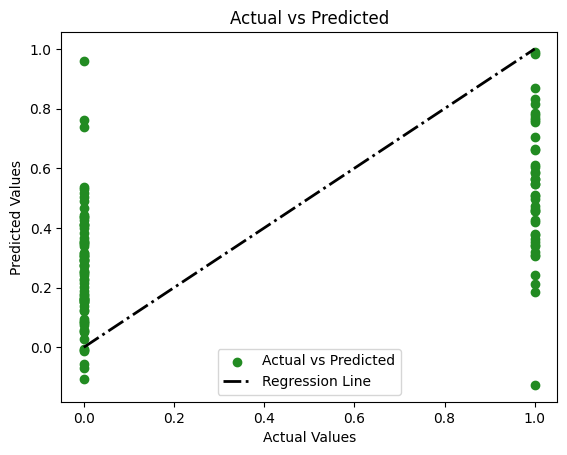

In [ ]:
plt.scatter(ytest, pred, color='forestgreen', label='Actual vs Predicted')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k-.', lw=2, label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

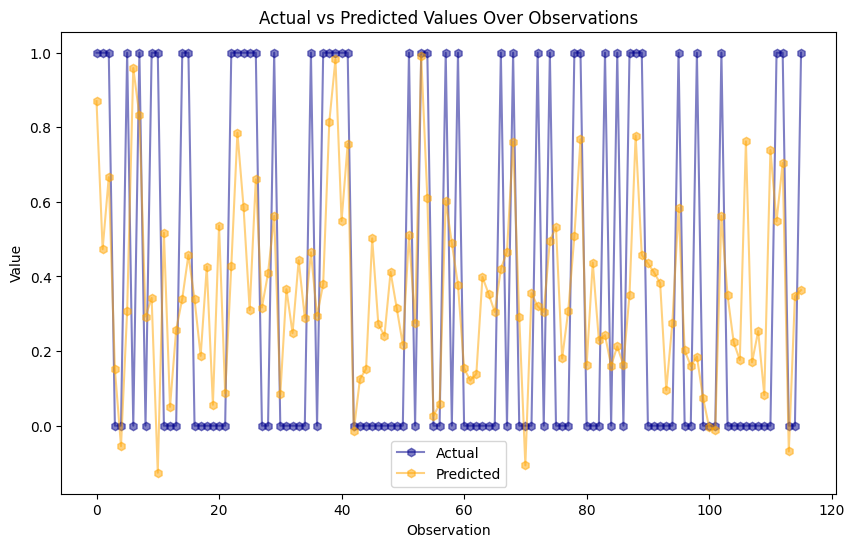

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(ytest)), ytest, marker='h', linestyle='-', color='darkblue', alpha=0.5, label='Actual')
plt.plot(range(len(ytest)), pred, marker='h', linestyle='-', color='orange', alpha=0.5, label='Predicted')
plt.xlabel('Observation')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values Over Observations')
plt.legend()
plt.show()



**Observations :**

From the above graph, we can see that the predicted values vary from the actual values by a large margin.

**Comparing this heart disease prediction with Weather prediction :**

In [85]:
url2 = 'https://raw.githubusercontent.com/dana-prthv/LINYA-Internship/main/seattle-weather.csv'
df2=pd.read_csv(url2)

In [86]:
df2.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [88]:
df2[['precipitation','temp_max','temp_min']] = df2[['precipitation','temp_max','temp_min']].replace(0,np.NaN)

In [89]:
df2['precipitation'].fillna(df2['precipitation'].median(), inplace =True)

df2['temp_max'].fillna(df2['temp_max'].median(), inplace =True)

df2['temp_min'].fillna(df2['temp_min'].median(), inplace =True)

In [115]:
df2.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [116]:
x=df2[['precipitation', 'temp_max', 'temp_min', 'wind']]

In [117]:
y=df2['weather']

In [118]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [119]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [120]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=40)

In [121]:
ypred=model.predict(xtest)

In [122]:
mse = mean_squared_error(ytest, ypred)
mse

1.366967000226192

In [123]:
r2 = r2_score(ytest, ypred)
r2

0.11754233590192542

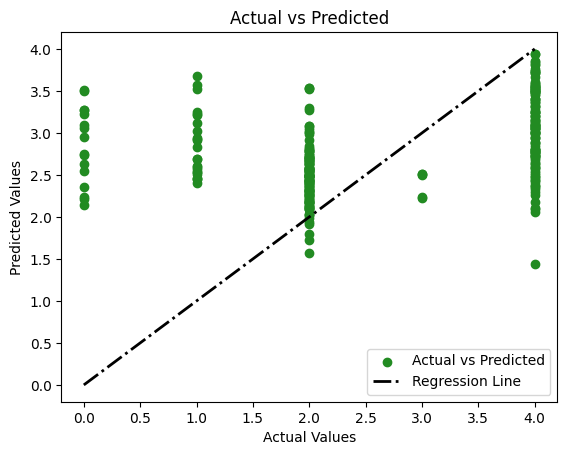

In [124]:
plt.scatter(ytest, ypred, color='forestgreen', label='Actual vs Predicted')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k-.', lw=2, label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

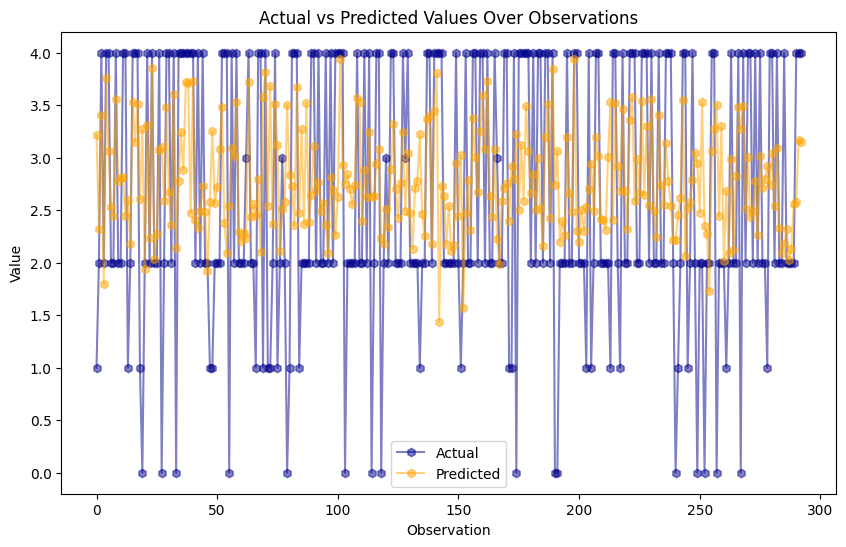

In [125]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(ytest)), ytest, marker='h', linestyle='-', color='darkblue', alpha=0.5, label='Actual')
plt.plot(range(len(ytest)), ypred, marker='h', linestyle='-', color='orange', alpha=0.5, label='Predicted')
plt.xlabel('Observation')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values Over Observations')
plt.legend()
plt.show()